# Preprocessing first selected Datasets
This second **pipeline** form shows how to take the dataframes obtained from *Filter1*, or any sucesive *Filter*, **pipeline** and create a basic plot showing the trend of a given indicator in time.

## 1. Obtaining a *.csv* from the raw source (for every source where needed)
This was done manually for the *.xlsx* files. The selected Spreadsheets were selected and saved as *.csv*. Original files are stored in the **raw_data** directory and resulting on the **source_data** directory. (csv UTF-8 format was selected).

## 2. Generic preprocessing pipeline for all source files
Each step is applied depending on the structure and format of the original table.

### 2.1 Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Set particular values

In [2]:
source_name = '\web_ener_balance.csv'
# Select Column as Index
index = ['Country']
# Assign selected indexes
sel_index = ['United States', 'India', 'Germany',"People's Republic of China"]
# Select years
years=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
# Select other Columns as ID's
other_ids = ['Product', 'Flow']

### 2.3 Apply all the changes to obtain the desired resumed long dataframe

In [3]:
df = pd.read_csv('Energy_Data\source_data' + source_name)
df_p = df[index+years+other_ids]
df_p=pd.melt(df_p, id_vars=index+other_ids)
df_p=df_p.set_index(index)
df_p = df_p.loc[sel_index]
df_p=df_p.rename(columns={'variable':'year'})

### 2.4 Do further necessary adjustments

In [4]:
# identify anomalies in numeric inputs and replace them
df_p.value=df_p.value.replace(['..', 'c'], '')
df_p.value=pd.to_numeric(df_p.value)
#Instedad of 'to_numeric()', 'astype()' or '.apply()' could have been used

## 3. Plot the desired indicators
Here we supposed that **df_p** is handed in in *long format*

### 3.1 Create a DF_Subset to plot
Here an internal understanding of the source data is required to know which Raws to select, according to the desired *id's*

**First we identify which columns (ids) are there to select from**
For all cases 'year' and 'value' needs to be available for pllotting afterwards

In [5]:
df_p.columns

Index(['Product', 'Flow', 'year', 'value'], dtype='object')

In this case we can further select from 'Product' and 'Flow'. In the most simple case, no extra coumns will be available (e.g. **other_ids = []**)

**Now we look into the unique options in the available extra ids to select our interest**

In [6]:
df_p.Product.unique()

array(['Coal, peat and oil shale', 'Crude, NGL and feedstocks',
       'Oil products', 'Natural gas', 'Nuclear', 'Renewables and waste',
       'Electricity', 'Heat', 'Total', 'Fossil fuels',
       'Renewable sources'], dtype=object)

In [7]:
df_p.Flow.unique()

array(['Production (ktoe)', 'Imports (ktoe)', 'Exports (ktoe)',
       'Total energy supply (ktoe)',
       'Electricity, CHP and heat plants (ktoe)',
       'Oil refineries, transformation (ktoe)',
       'Total final consumption (ktoe)', 'Industry (ktoe)',
       'Transport (ktoe)', 'Residential (ktoe)',
       'Commercial and public services (ktoe)',
       'Other final consumption (ktoe)', 'Electricity output (GWh)'],
      dtype=object)

**A selection is possible from the give options of each id**
Note that not *all* the options of one id correspond with all the options of the other one

In [8]:
# Here a Loop may be applicable, defining the following characteristics as lists instead 
# of strings and then enabling multiple plot generation
select_country='Germany'
select_id = ['Product','Flow']
select_option = ['Renewable sources','Electricity output (GWh)']

In [9]:
df_graph = df_p.loc[select_country]
for i in range(0,len(select_id)-1):
    df_graph=df_graph[df_graph[select_id[i]]==select_option[i]]  
df_graph.head()

,Product,Flow,year,value
Country,,,,
Germany,Renewable sources,Electricity output (GWh),2000,35475.0
Germany,Renewable sources,Electricity output (GWh),2001,37895.0
Germany,Renewable sources,Electricity output (GWh),2002,44477.0
Germany,Renewable sources,Electricity output (GWh),2003,46670.0
Germany,Renewable sources,Electricity output (GWh),2004,57957.0


### 3.2 Set other characteristics of the plot

In [10]:
# Here some features of the seaborn package or an eventual coupling 
# with R to use the GGPlot library is to be introduced

### 3.3 Create the Plot

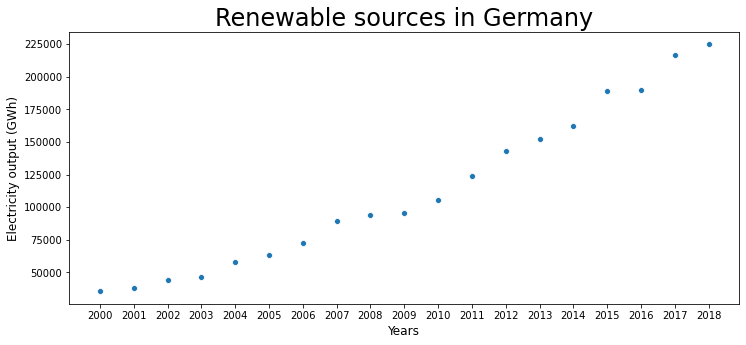

In [11]:
# Set figure size (width, height) in inches 
fig, ax = plt.subplots(figsize = ( 12 , 5 )) 
  
# Plot the scatterplot 
sns.scatterplot( ax = ax , x='year', y='value', data=df_graph) 
  
# Set label for x-axis 
ax.set_xlabel( 'Years' , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( select_option[len(select_id)-1] , size = 12 ) 
  
# Set title for plot 
ax.set_title( select_option[0]+' in '+select_country , size = 24 ) 
  
# Display figure 
plt.show() 